In [ ]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import models

In [ ]:
from  keras.datasets import mnist
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train_vec=x_train.reshape((60000, 784))/255.0
x_test_vec=x_test.reshape((10000, 784))/255.0


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = Input(shape=(784,))
layer1 = Dense(100,activation='relu')(input_img)
layer2 = Dense(20,activation='relu')(layer1)
layer3 = Dense(100,activation='relu')(layer2)
layer4 = Dense(784,activation='relu')(layer3)

In [ ]:
model = models.Model(input_img,layer4)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 161,804
Trainable params: 161,804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')
history=model.fit(x_train_vec,x_train_vec,batch_size=128,epochs=50)

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.0516
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0304
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0263
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0236
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0222
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0208
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0202
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0194
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0185
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0180
Epoch 11/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0177
Epoch 12/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0173
Epoch 13/50
469/469 [====

In [ ]:
encoder = models.Model(input_img,layer2)
encoder.summary()

In [ ]:
encoded_test = encoder.predict(x_test_vec)
encoded_test.shape

(10000, 20)

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

embedded_test = TSNE(n_components=2).fit_transform(encoded_test)


In [ ]:

feat_cols = [ 'pixel'+str(i) for i in range(x_test_vec.shape[1]) ]
df = pd.DataFrame(x_test_vec,columns=feat_cols)

df['y'] = y_test
df['label'] = df['y'].apply(lambda i: str(i))



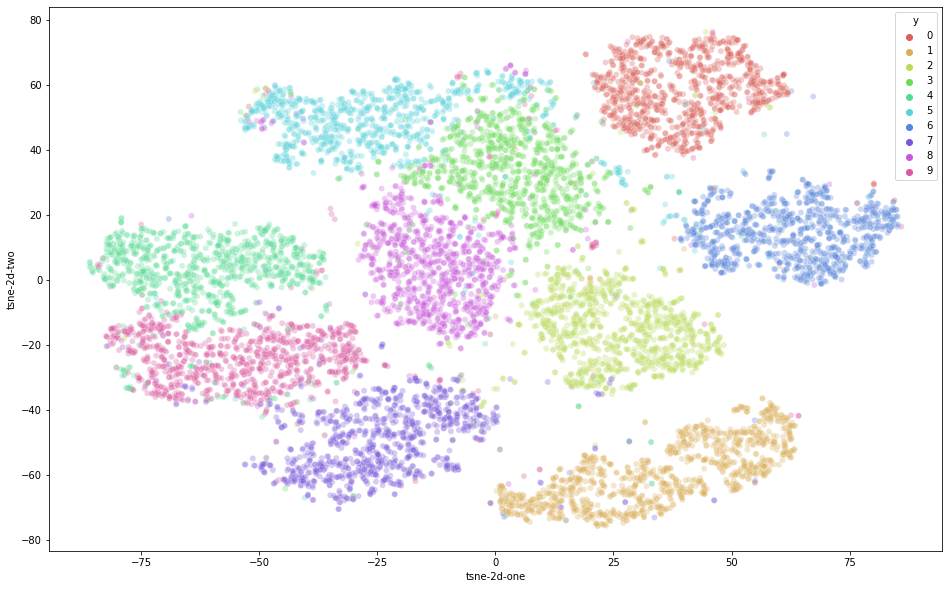

In [ ]:


df['tsne-2d-one'] = embedded_test[:,0]
df['tsne-2d-two'] = embedded_test[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [ ]:
from  keras.datasets import mnist
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train_vec=x_train.reshape((60000, 28,28,1))/255.0
x_test_vec=x_test.reshape((10000, 28,28,1))/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = Input(shape=(28,28,1))

In [ ]:
encode1 = Conv2D(8,(3,3),activation='relu',padding='same')(input_img)
encode2 = MaxPooling2D((2,2),padding='same')(encode1)
encode3 = Conv2D(4,(3,3),activation='relu',padding='same')(encode2)
encode4 = MaxPooling2D((2,2),padding='same')(encode3)
encode5 = Conv2D(4,(3,3),activation='relu',padding='same')(encode4)
encode6 = MaxPooling2D((2,2),padding='same')(encode5)

In [ ]:
dencode1 = Conv2D(4,(3,3),activation='relu',padding='same')(encode6)
dencode2 = UpSampling2D((2,2))(dencode1)
dencode3 = Conv2D(4,(3,3),activation='relu',padding='same')(dencode2)
dencode4 = UpSampling2D((2,2))(dencode3)
dencode5 = Conv2D(8,(3,3),activation='relu')(dencode4)
dencode6 = UpSampling2D((2,2))(dencode5)
dencode7 = Conv2D(1,(3,3),activation='relu',padding='same')(dencode6)


In [ ]:
encode1 = Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
encode2 = MaxPooling2D((2,2),padding='same')(encode1)
encode3 = Conv2D(32,(3,3),activation='relu',padding='same')(encode2)
encode4 = MaxPooling2D((2,2),padding='same')(encode3)

dencode1 = Conv2D(32,(3,3),activation='relu',padding='same')(encode4)
dencode2 = UpSampling2D((2,2))(dencode1)
dencode3 = Conv2D(32,(3,3),activation='relu',padding='same')(dencode2)
dencode4 = UpSampling2D((2,2))(dencode3)
dencode5 = Conv2D(1,(3,3),activation='relu')(dencode4)


In [ ]:
model = models.Model(input_img,dencode7)

In [ ]:
model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 7, 7, 4)           148       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 4)         

In [ ]:
x_train_vec.shape

(60000, 28, 28, 1)

In [ ]:
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train_vec + noise_factor* np.random.normal(loc=0.0,scale=1.0,size=x_train_vec.shape)
x_test_noisy = x_test_vec + noise_factor* np.random.normal(loc=0.0,scale=1.0,size=x_test_vec.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')
history = model.fit(x_train_noisy, x_train, batch_size=1024, epochs=10)

Epoch 1/10
59/59 [==============================] - 48s 809ms/step - loss: 0.1120
Epoch 2/10
59/59 [==============================] - 47s 802ms/step - loss: 0.1120
Epoch 3/10
59/59 [==============================] - 47s 805ms/step - loss: 0.1120
Epoch 4/10
59/59 [==============================] - 47s 802ms/step - loss: 0.1120
Epoch 5/10
59/59 [==============================] - 47s 802ms/step - loss: 0.1120
Epoch 6/10
59/59 [==============================] - 47s 803ms/step - loss: 0.1120
Epoch 7/10
59/59 [==============================] - 48s 815ms/step - loss: 0.1120
Epoch 8/10
59/59 [==============================] - 47s 803ms/step - loss: 0.1120
Epoch 9/10
59/59 [==============================] - 47s 803ms/step - loss: 0.1120
Epoch 10/10
59/59 [==============================] - 48s 810ms/step - loss: 0.1120


In [ ]:
!pip install diagrams

     |████████████████████████████████| 19.3MB 1.4MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram") as diag:
    EC2("web")

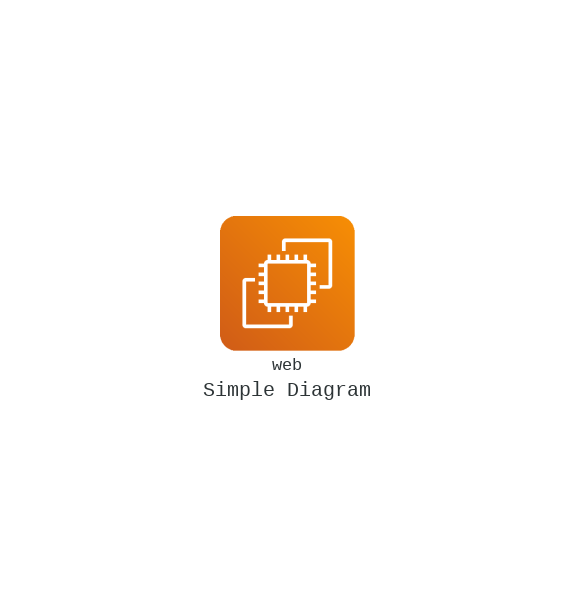

In [ ]:
diag